In [2]:
#import necessary libraries 
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#import dataset 
df = pd.read_csv("titanicDataset\\train.csv")
#print data shape
print(df.shape)

(891, 12)


In [4]:
#print the dataset 
df.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Details of the project
Project Goal: Predict if a passenger survived the titanic disaster (Binary Classification: 0 - Didn't survive, 1 - Survived) <br>
Relevant data: Age, Sex, CLass, Ticket Fare

In [5]:
df.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Describing the data ### 
1. PassengerId<br> - Irrelevant for survival
2. Survived<br> - 38% survived the disaster, 62% did not survive <br> - This also means that we have an imbalanced dataset (some models might need balancing technique)
3. Sex <br> - 577 males ( more males than females ) <br> - since males dominate the dataset, survival rates should be checked saperately for each males and females
4. PClass<br> - mean = 2.3 > 2, which means most of the people were in class 3 (lower deck) <br> Explanation: There are 3 classes 1,2,3. If most were in 1st or 2nd class, the mean would have been between  1 & 2. Here its higher than 2, means most were in class 3.
5. Age<br> - Most of them were below 30 years old <br> - 50% (median) were 28 or below <br>- 75% of the population were 38 or below <br> - Max age was 80 <br> - (df.info() shows only 714 non-null values): Need to fill or drop missing values.
6. Sibsp (Siblings or Spouse)<br> - mean = 0.5, which means most of them were alone <br> - 50% (median) of the population had no spouse or siblings onboard <br> - 75% had 1 sibling or spouse <br> - Max sibling/spouse count is 8 (could be an outlier)
7. Parch (Parents on board) <br> - mean = 0.3, which means again most were alone <br> - 75% of the population had no parents on board
8. Ticket <br> - 681 unique tickets <br> - 347082 repeated itself 7 times (could be a family) <br> - ticket alone maybe not much useful for prediction
9. Fare <br> - mean = 32, is the average ticket price <br> - 75% of the populations ticket price was 31 <br> - but the max ticket price was 512 (showing an extreme outlier) <br> - The standard deviation is 49, which means there is a lot of variation in the ticket price for rest 25% of population, they have paid a very higher price far above the mean <br> - Explanation: If fares were same, the std would be low(eg. 5-10). The high std means people paid extremely high fares
10. Cabin <br> - since only 204/891 values are only available, these are not useful for prediction. <br> - since higher-class passengers were likely to have cabins on higher decks, this means: <br> - Deck A, B, C were likely for 1st class.<br>  - Deck D, E, F may have been for 2nd class.<br>  - Deck G, and possibly no-cabin passengers, were likely 3rd class.<br> 
Theory: If the Titanic sank top-down, higher decks (A, B, C) had a better chance of evacuation than lower decks (D, E, F, G).So, extracting the deck from the Cabin feature could be useful in predicting survival.<br>
11. Embarkment <br> - there are 3 categories: S = Southampton, C = Cherbourg, Q = Queenstown 
12. Summary<br>
Feature-------------Statistic-------------------------Interpretation <br>
Pclass-------------Mean = 2.31---------------More passengers were in lower classes (closer to 3 than 1).<br>
SibSp----------Mean = 0.52,Median = 0--------Most traveled alone because half had no siblings/spouses.<br>
Parch----------Mean = 0.38,Median = 0--------Most had no parents/children aboard.<br>
Fare-------------Std = 49.69-----------------Some paid extremely high fares, creating large variation.<br>

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Part 1: Lets start answering some questions by visualizing

### 1. How many passengers survived vs didnt survive? <br>
If survival rate is low, this confirms the disaster was severe. <br>
This also tells us whether we need to balance the dataset.

Survived
0    549
1    342
Name: count, dtype: int64

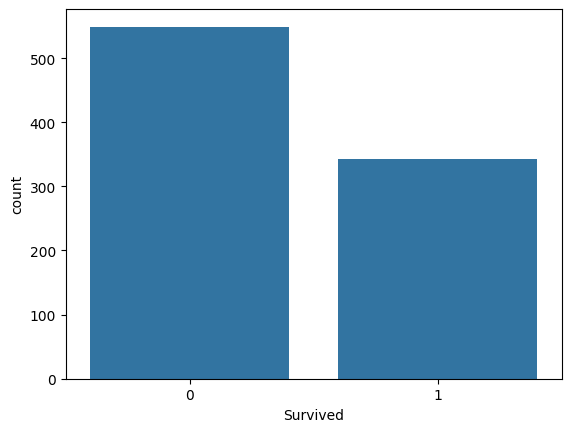

In [43]:
sns.countplot(x = 'Survived', data = df)
df['Survived'].value_counts()

### 2. Did women survive more than men? <br>
If females have a much higher survival rate, it supports the idea that women and children were prioritized. <br>
If males have a very low survival rate, this means gender was a strong predictor of survival.

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

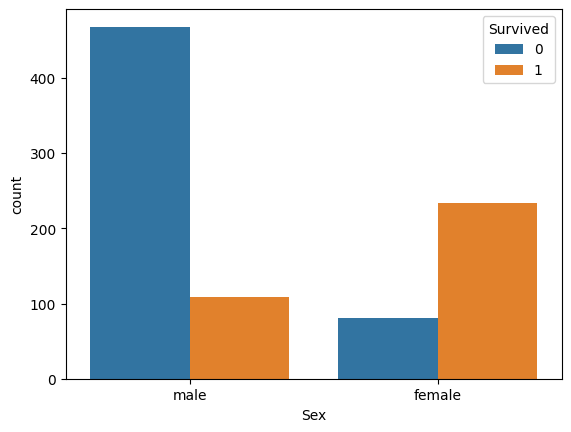

In [44]:
sns.countplot(x = 'Sex', data = df, hue = 'Survived')
df.groupby(['Sex', 'Survived']).size()

### 3. Did 1st-class passengers survive more? <br>
If 1st-class passengers had a higher survival rate, it means wealth/status played a role. <br>
If 3rd-class passengers had a low survival rate, it suggests they had worse access to lifeboats.

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

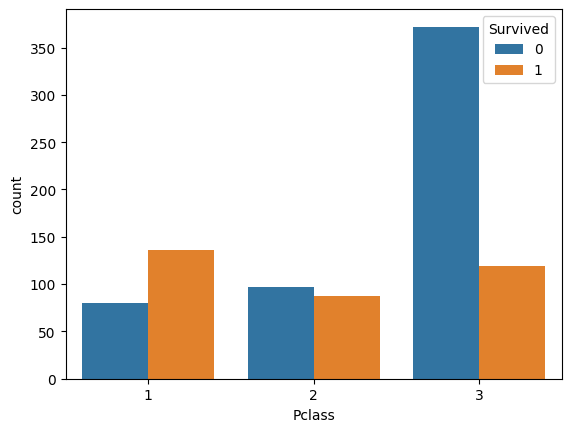

In [45]:
sns.countplot( x = 'Pclass', data = df, hue = 'Survived')
df.groupby(['Pclass', 'Survived']).size()

### 4. Did passengers who paid more had higher chances of survival? <br>
If higher fares = higher survival, it suggests wealthier passengers had better access to lifeboats. <br>
Outliers (very high fares) might distort the pattern, so log transformation might help.

<Axes: xlabel='Survived', ylabel='Fare'>

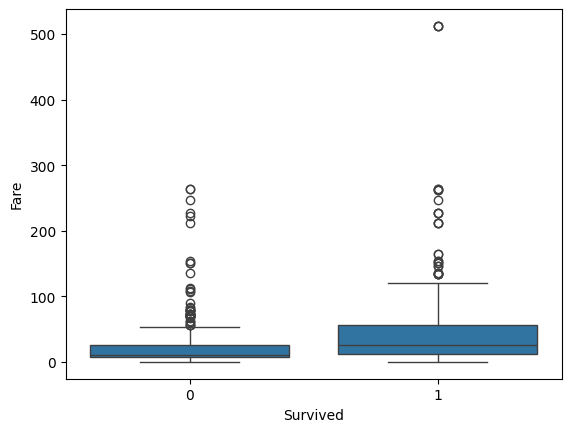

In [46]:
sns.boxplot(data = df, x = 'Survived', y = 'Fare')

1. Observing the medians <br> - median for surviver is heigher than that of non survivers <br> - This suggests that passengers who paid higher fares had a better chance of survival, likely because they were in higher-class cabins.
2. Box <br> - Box represents 50% of the fare <br> - Box for 1 is higher than 0, meaning fares were higher for survivers
3. Whiskers <br> - Show the range of typical fares (more for survivers)<br> - More variability in ticket price among survivers
4. Outliers <br> - Both have outliers <br> - Some survivers paid more money (>500) <br> - There were some high fares for non survivers but only few survived
5. Conclusion <br> - High fares = High chance of survival ( maybe better chances of getting life boat) <br> - Distribution of fares is higher for survivers, suggesting a mix of wealthy and mid-range paying passengers.

### 5. Did younger passengers and women have a better survival rate ? <br>
If more young children survived, it supports the "women and children first" rule. <br>
If elderly survival rate is low, it suggests difficulty in evacuating.

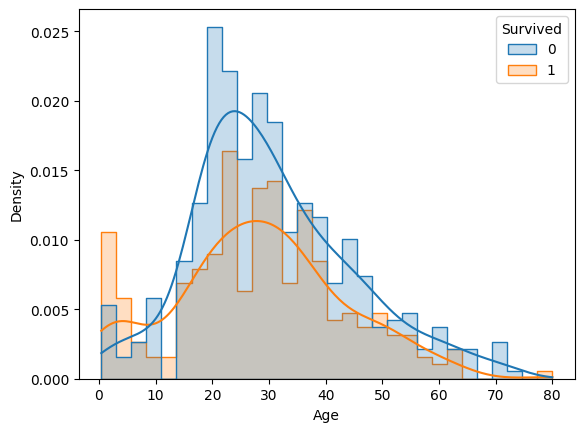

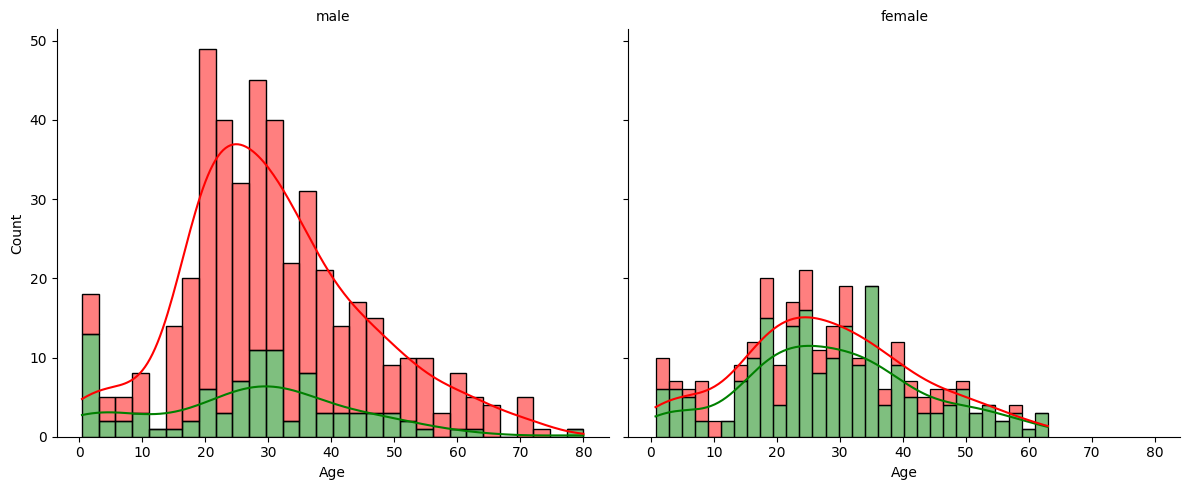

In [47]:
sns.histplot(data = df, x = 'Age', hue="Survived", bins=30, kde=True, element="step", stat="density")
# Separate by sex
g = sns.FacetGrid(df, col="Sex", height=5, aspect=1.2)
g.map_dataframe(sns.histplot, x="Age", hue="Survived", multiple="stack", kde=True, bins=30, palette={0: "red", 1: "green"})
g.set_titles(col_template="{col_name}")

1. More number of women and young children < 10 survived. (Women & Children rule was followed)
2. Families likely prioritised saving children and women
3. Most people were between 20-30. Higher death rates for middle aged
4. 60+ didn't survive much. They had difficulty in evacuating. Older people were more vulnerable and had low survival chances

### 6. Did traveling with family improve survival chances? <br>
If small families survived more than solo travelers, it means group support helped.<br>
If large families had a low survival rate, it could mean they struggled to evacuate.

<Axes: xlabel='FamilySize', ylabel='Survived'>

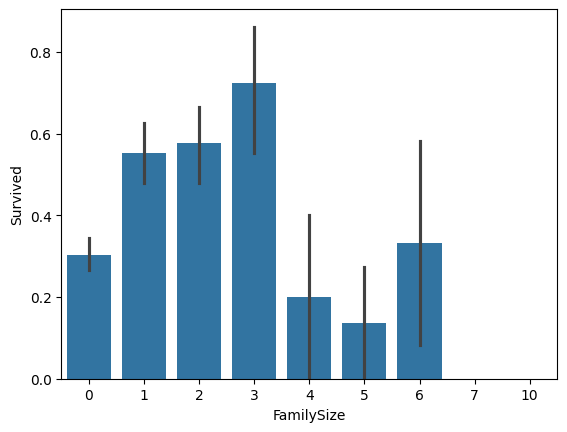

In [48]:
df['FamilySize'] = df['SibSp'] + df['Parch']
sns.barplot(x = df['FamilySize'], y = df['Survived'])

1. People with family size of 1-3 had higher survival rate. They had support for evacuation.
2. People alone had comparitively low survival rate, as they might have been less prioritised.
3. People with more 3+ family members survived less, because its harder for priorise and evacuate.

### 7. Did passengers from a certain port survive more? <br>
If one embarkation point had higher survival, it might suggest wealthier people boarded there. <br>
If embarked passengers from 'S' had lower survival, it could be due to more 3rd-class travelers.

S = Southampton, C = Cherbourg, Q = Queenstown


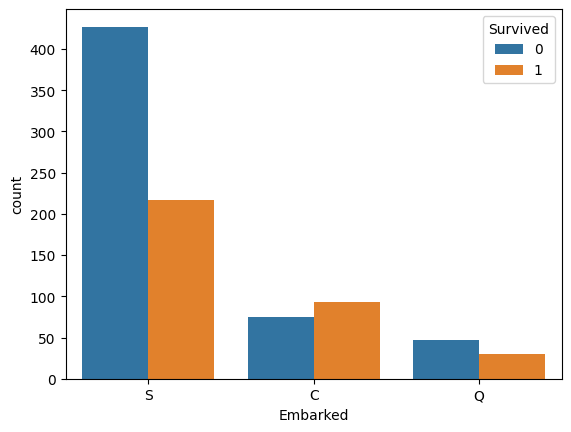

In [49]:
sns.countplot( x = 'Embarked', data = df, hue = 'Survived')
print("S = Southampton, C = Cherbourg, Q = Queenstown")

## Data Analysis Summary
1. It was a severe disaster. Out of 891 passesngers, only 342 survived and rest 549 were not able to survive.
2. There were 314 females on board. 233 Survived and 81 did not. There were 577 males on board. Only 109 survived and 468 did not. Women survived more than men.
3. Passengers on 1st class survived more and number of number people on 3rd class faced more death.
4. Passengers who paid more survived more.
5. Females and children survived more. Women and Children first rule was applied
6. Family size of 3-4 also helped to an extend, had support. People travelling alone and with family size 4+ had less survival rate (less support and chaos).
7. Passengers from Chernbourg had more survival rate than people from other port. (maybe more wealthy people from there)

#### Important features from thie dataframe could be 
1. Age
2. Sex
3. class
4. Cabin (Passenger class)
5. Family size
6. Embarkment

# Part 2: Data Preprocessing & Feature Engineering

## Step 1:  Handle missing values 
Goal: Fill or remove missing values so the model can train properly.
- Check for missing values first

In [50]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


In [51]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
FamilySize       0
dtype: int64

## Step 2:  Feature Engineering
Goal: Create new features to improve model performance.
- Extract Title from Name
- Convert ‘Sex’ to Numeric (Label Encoding)
- Create a new IsAlone Feature
- Extract Deck from Cabin
- Filling NaN values in ‘Embarked’ and 'Deck'
- Convert ‘Embarked’ to Numerical (One-Hot Encoding)

### 1. Extract Titles from names.

In [52]:
#Import the regular expression library
import re
pattern = r' ([A-Za-z]+)\.'  #This pattern captures the just the titile from the name
df['Title'] = df['Name'].str.extract(pattern)
#The codes below would help to reduce the categories for better model prediciton
df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
df['Title'] = df['Title'].replace(['Mme', 'Countess', 'Lady', 'Dona'], 'Mrs')
df['Title'] = df['Title'].replace(['Capt', 'Col', 'Dr', 'Major', 'Rev'], 'Officer')
print(df['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Officer' 'Sir' 'Jonkheer']


### 2. Convert 'Sex' into Numeric

In [53]:
if df['Sex'].dtypes == 'object':
    df['Sex'] = df['Sex'].map({"male" : 0, "female" : 1})
print(df['Sex'].dtypes, df['Sex'].unique())

int64 [0 1]


### 3. Create a new IsAlone column

In [54]:
df['IsAlone'] = (df['FamilySize'] == 0).astype(int)

### 4. Extract Deck from Cabin

In [55]:
df['Deck'] = df['Cabin'].str[0]
df['Deck'] = df['Deck'].fillna('Unknown')

### 5. Filling NaN values in ‘Embarked’ and 'Deck'

In [56]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [57]:
embarked_nan_df = df[df['Embarked'].isna()]
embarked_nan_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title,IsAlone,Deck
61,62,1,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN,0,Miss,1,B
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN,0,Mrs,1,B


#### Filling NaN values in Embarkment
Strategy for Filling NaN Values in 'Embarked' Based on Ticket Price and Cabin <br>
Lets fill missing values in 'Embarked' based on the ticket price and cabin location:
- Cabin Information: Check from which port most of the people in deck B embarkated from?
- Fare Information: Check how much most people paid in deck B by embarkation port.
- Logic: If a passenger's fare is above a certain threshold and their deck is from a higher class (e.g., 'A', 'B', 'C'), we can reasonably assume they might have boarded from Southamption(S) or Cherbourg(C). We can fill NaN values with respective port for such passengers.

- Cabin information

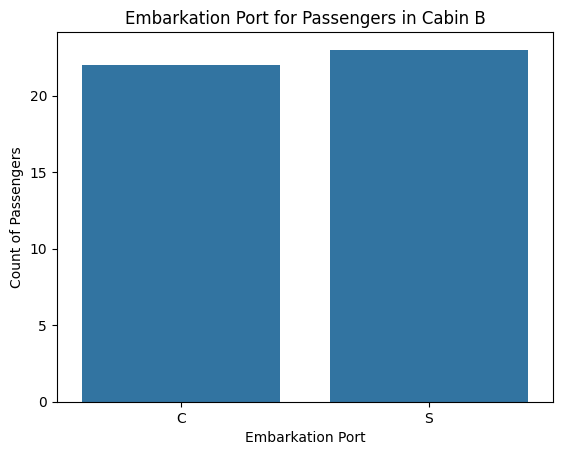

23


In [58]:
cabin_b_df = df[df['Deck'] == 'B']
# Plot the embarkation port distribution for cabin B
sns.countplot(x = 'Embarked', data = cabin_b_df)
plt.title('Embarkation Port for Passengers in Cabin B')
plt.xlabel('Embarkation Port')
plt.ylabel('Count of Passengers')
plt.show()
cabin_b_df['Embarked'].value_counts()
print(cabin_b_df['Embarked'].value_counts()['S'])

- Fare information

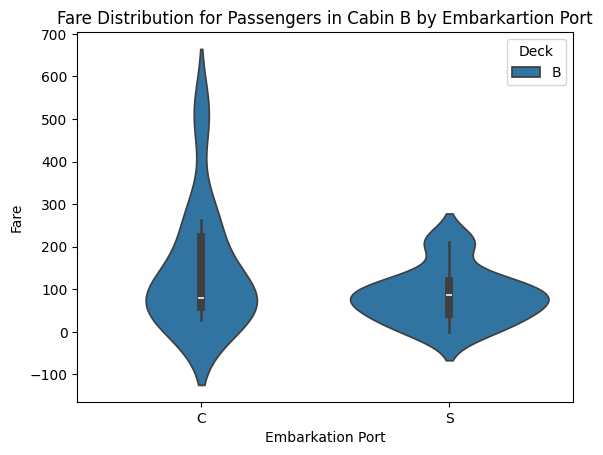

In [59]:
# Plot the distribution of fares for cabin B
sns.violinplot( x = 'Embarked', y = 'Fare', data = cabin_b_df, hue = 'Deck')
plt.title('Fare Distribution for Passengers in Cabin B by Embarkartion Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Fare')
plt.show()

- Seems like most people who belonged to deck B were from Southampton
- Most people from southampton paid 50 - 100 towards ticket price for B deck

#### Applying fill_embarkment function 

In [60]:
def fill_embarked(row):
    if pd.isna(row['Embarked']): #If the embarked in the row is NaN
        if df['Fare'].mean() <= row['Fare'] <= 100 and row['Deck'] in ['A', 'B', 'C']:
            return 'S'
        else: 
            return 'C'
    return row['Embarked']

df['Embarked'] =  df.apply(fill_embarked, axis = 1)
        

#### Filling NaN values in Deck
Strategy for Filling NaN Values in 'Deck':
# To be looked at if needed

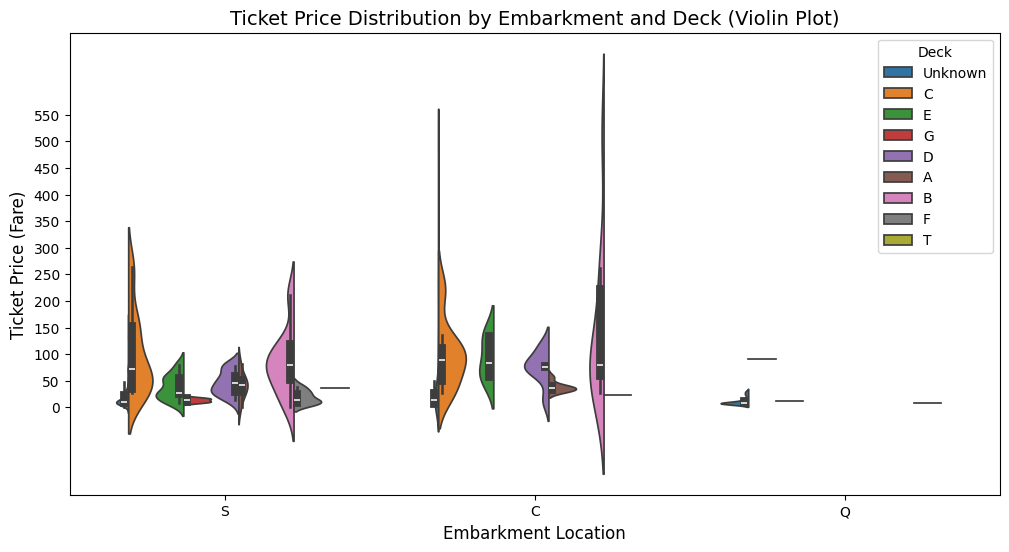

In [61]:
# Create a violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='Embarked', y='Fare', hue='Deck', data=df, split=True)
# Set the y-axis ticks to be in steps of 50
plt.yticks(np.arange(0, df['Fare'].max() + 50, 50))
# Adding title and labels
plt.title('Ticket Price Distribution by Embarkment and Deck (Violin Plot)', fontsize=14)
plt.xlabel('Embarkment Location', fontsize=12)
plt.ylabel('Ticket Price (Fare)', fontsize=12)

# Display the plot
plt.show()

### 6. Convert ‘Embarked’ to Numerical (One-Hot Encoding)

In [62]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [63]:
if 'Embarked' in df:
    df = pd.get_dummies(df, columns = ['Embarked'], drop_first = True) # We use drop_first = True to delete the first colum for reducing multicolinairty
df['Embarked_Q'] = df['Embarked_Q'].astype(int)
df['Embarked_S'] = df['Embarked_S'].astype(int)
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Title,IsAlone,Deck,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1,Mr,0,Unknown,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,Mrs,0,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,Miss,1,Unknown,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1,Mrs,0,C,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,Mr,1,Unknown,0,1


## Step 3:   Handle Outliers (Fare & Age)
Goal: Remove or transform extreme values.
- Handle High Fare Outliers
- Normalize Age

In [64]:
df['Fare'] = df['Fare'].apply(lambda x: np.log(x + 1)) #Taking log value to handle the extreme outliers in fare colmn

In [65]:
#Performing group based impuation for age on feature engineered dataset.
df['Age'] = df.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))
#Normalising the age column again
df['Age'] = ( df['Age'] - df['Age'].mean()) / (df['Age'].std()) #Normalising the Age since age is a more normally distributed variable.

In [1]:
df['Age'].mean()

NameError: name 'df' is not defined

### 7. Convert ‘Pclass’ to Numerical (One-Hot Encoding)

In [66]:
if 'Pclass' in df:
    df = pd.get_dummies(df, columns = ['Pclass'], drop_first = True) # We use drop_first = True to delete the first colum for reducing multicolinairty
df['Pclass_2'] = df['Pclass_2'].astype(int)
df['Pclass_3'] = df['Pclass_3'].astype(int)
df.head(5)

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Title,IsAlone,Deck,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",0,-0.534591,1,0,A/5 21171,2.110213,NaN,1,Mr,0,Unknown,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0.668017,1,0,PC 17599,4.280593,C85,1,Mrs,0,C,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",1,-0.233939,0,0,STON/O2. 3101282,2.188856,NaN,0,Miss,1,Unknown,0,1,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.442528,1,0,113803,3.990834,C123,1,Mrs,0,C,0,1,0,0
4,5,0,"Allen, Mr. William Henry",0,0.442528,0,0,373450,2.202765,NaN,0,Mr,1,Unknown,0,1,0,1


## Step 4: Final Data Preparation
- Drop unnecessary columns: Name, Ticket, PassengerId
- Recheck missing values & confirm changes
- Things to improve: 
1. Strategy for Filling NaN Values in 'Deck':
#### a) keep unknown as a saperate category
b) assign deck based on pclass

2. Encoding methods for Name and Deck
a) name - one-hot-encoding
b) deck - label encoding

In [67]:
df.head(5)

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Title,IsAlone,Deck,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",0,-0.534591,1,0,A/5 21171,2.110213,NaN,1,Mr,0,Unknown,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0.668017,1,0,PC 17599,4.280593,C85,1,Mrs,0,C,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",1,-0.233939,0,0,STON/O2. 3101282,2.188856,NaN,0,Miss,1,Unknown,0,1,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.442528,1,0,113803,3.990834,C123,1,Mrs,0,C,0,1,0,0
4,5,0,"Allen, Mr. William Henry",0,0.442528,0,0,373450,2.202765,NaN,0,Mr,1,Unknown,0,1,0,1


In [68]:
#Drop unnecessary columns
df = df.drop( ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis = 1)

In [69]:
#Rearranging the dataset
new_order = ['Title', 'Age', 'Sex', 'Fare', 'Pclass_2', 'Pclass_3', 'Deck', 'FamilySize', 'IsAlone', 'Embarked_Q', 'Embarked_S', 'Survived']
df = df[new_order]
df.head(5)

,Title,Age,Sex,Fare,Pclass_2,Pclass_3,Deck,FamilySize,IsAlone,Embarked_Q,Embarked_S,Survived
0,Mr,-0.534591,0,2.110213,0,1,Unknown,1,0,0,1,0
1,Mrs,0.668017,1,4.280593,0,0,C,1,0,0,0,1
2,Miss,-0.233939,1,2.188856,0,1,Unknown,0,1,0,1,1
3,Mrs,0.442528,1,3.990834,0,0,C,1,0,0,1,1
4,Mr,0.442528,0,2.202765,0,1,Unknown,0,1,0,1,0


In [70]:
df.isnull().sum()

Title         0
Age           0
Sex           0
Fare          0
Pclass_2      0
Pclass_3      0
Deck          0
FamilySize    0
IsAlone       0
Embarked_Q    0
Embarked_S    0
Survived      0
dtype: int64

#### Encoding methods for Name and Deck

In [71]:
#Deck: for now lets use label encoding because deck has an order.
print(df['Deck'].unique())

['Unknown' 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']


In [72]:
deck_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T':8, 'Unknown': 0}
df['Deck'] = df['Deck'].map(deck_mapping)
#Normal question, do we need to scale?
# Since Deck is a category (A, B, C... → 1, 2, 3...), it doesn’t represent a numerical value like Age or Fare.
# Scaling is only needed for continuous numerical data like Age and Fare.

In [73]:
df.head(5)

,Title,Age,Sex,Fare,Pclass_2,Pclass_3,Deck,FamilySize,IsAlone,Embarked_Q,Embarked_S,Survived
0,Mr,-0.534591,0,2.110213,0,1,0,1,0,0,1,0
1,Mrs,0.668017,1,4.280593,0,0,3,1,0,0,0,1
2,Miss,-0.233939,1,2.188856,0,1,0,0,1,0,1,1
3,Mrs,0.442528,1,3.990834,0,0,3,1,0,0,1,1
4,Mr,0.442528,0,2.202765,0,1,0,0,1,0,1,0


In [74]:
#Name: for now lets use one hot encoding because title has no order.
print(df['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Officer' 'Sir' 'Jonkheer']


In [75]:
if 'Title' in df:
    if df['Title'].dtypes == 'object':
        df = pd.get_dummies(df, columns = ['Title']) # We use drop_first = True to delete the first colum for reducing multicolinairty
df['Title_Don'] = df['Title_Don'].astype(int)
df['Title_Jonkheer'] = df['Title_Jonkheer'].astype(int)
df['Title_Master'] = df['Title_Master'].astype(int)
df['Title_Miss'] = df['Title_Miss'].astype(int)
df['Title_Mr'] = df['Title_Mr'].astype(int)
df['Title_Mrs'] = df['Title_Mrs'].astype(int)
df['Title_Officer'] = df['Title_Officer'].astype(int)
df['Title_Sir'] = df['Title_Sir'].astype(int)

In [77]:
#Rearranging the dataset
new_order_post_title = ['Title_Don', 'Title_Jonkheer','Title_Officer' ,'Title_Master','Title_Sir', 'Title_Mr',
                        'Title_Miss', 'Title_Mrs','Age', 'Sex', 'Fare', 'Pclass_2', 'Pclass_3', 'Deck', 'FamilySize', 'IsAlone', 'Embarked_Q', 'Embarked_S', 'Survived']
df = df[new_order_post_title]

In [79]:
df.head()

,Title_Don,Title_Jonkheer,Title_Officer,Title_Master,Title_Sir,Title_Mr,Title_Miss,Title_Mrs,Age,Sex,Fare,Pclass_2,Pclass_3,Deck,FamilySize,IsAlone,Embarked_Q,Embarked_S,Survived
0,0,0,0,0,0,1,0,0,-0.534591,0,2.110213,0,1,0,1,0,0,1,0
1,0,0,0,0,0,0,0,1,0.668017,1,4.280593,0,0,3,1,0,0,0,1
2,0,0,0,0,0,0,1,0,-0.233939,1,2.188856,0,1,0,0,1,0,1,1
3,0,0,0,0,0,0,0,1,0.442528,1,3.990834,0,0,3,1,0,0,1,1
4,0,0,0,0,0,1,0,0,0.442528,0,2.202765,0,1,0,0,1,0,1,0


## Final check for Data Preprocessing & Feature  before model training
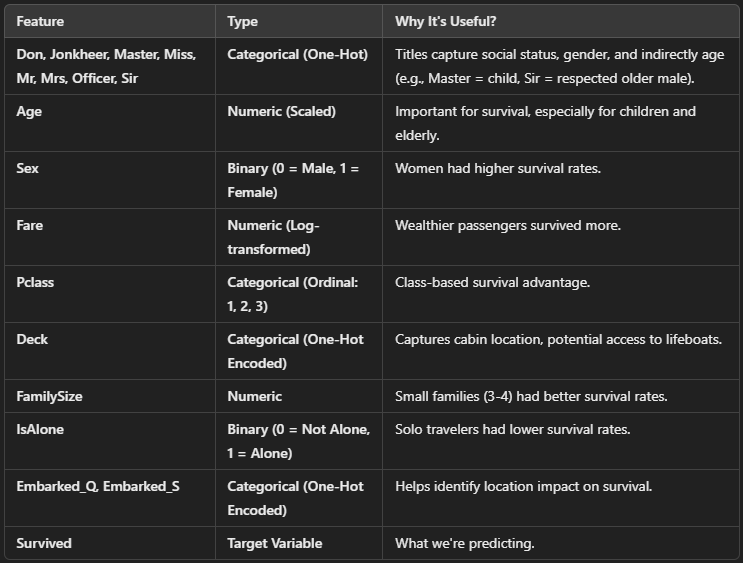 <br>
- ##### Correlation Check <br>
  Identify which features are most strongly related to survival.<br>
  If two features are highly correlated, one may be redundant.
- ##### Distribution Check <br>
  If distributions are highly skewed, consider further transformations (like log or standard scaling).

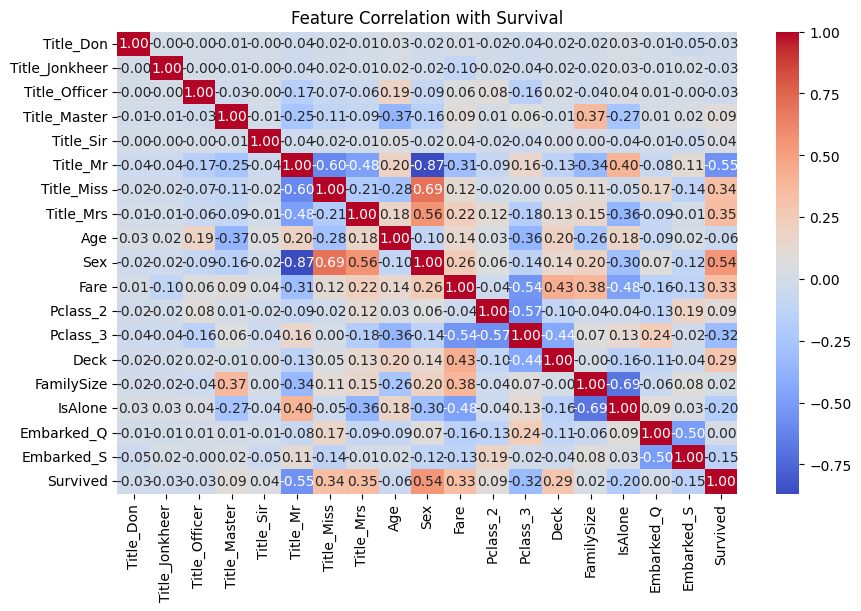

In [80]:
#Correlation check
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation with Survival")
plt.show()

### Key Observation
##### Features with high corellation
- Sex (0.54, strong positive) : Females had higher chance of surviving
- Fare (0.33, moderate positive) : Wealthy people had higher chance of survival.
- Title Miss,Mrs (0.34,0.35, moderate positive) : women who are married/unmarried had higher survival chance
- Pclass (-0.34, strong negative) : 3rd class passengers had lower survival rate
- IsAlone (-0.20, moderate negative) : People who travelled alone had lower survival chance, lack of support <br>
What this means: <br>
Being female, wealthy, or in 1st class strongly increases survival chances.<br>
Solo travelers & lower-class passengers were at a disadvantage.
 
##### Strong Correlations Between Features (Multicollinearity)
- Pclass & Fare (-0.66, Strong Negative) → Higher-class passengers paid more.
- Sex & Title_Mr (-0.87, Very Strong Negative) → Males mostly had "Mr" as a title.
- Sex & Title_Miss (0.69, Strong Positive) → Females were often labeled "Miss"
- FamilySize & IsAlone (-0.69, Strong Negative) → Larger families mean IsAlone = 0. <br>
What this means: <br>
Some features are redundant (e.g., Sex & Title_Mr). <br>
Multicollinearity can affect some models (like Logistic Regression), so consider dropping one of the highly correlated features.

##### Features with Little Impact on Survival
- Age (-0.06, Very Weak Negative) → Not strongly correlated, but might still be useful when combined with other factors (like children vs. adults).
- Deck (0.29, Weak Positive) → Not strongly correlated but could still be useful in higher classes.
- Embarked_S & Embarked_Q (Near 0) → Minimal impact on survival (we can reconsider these). <br>
What this means:<br>
Some features might not contribute much, and removing them could simplify the model without losing accuracy.

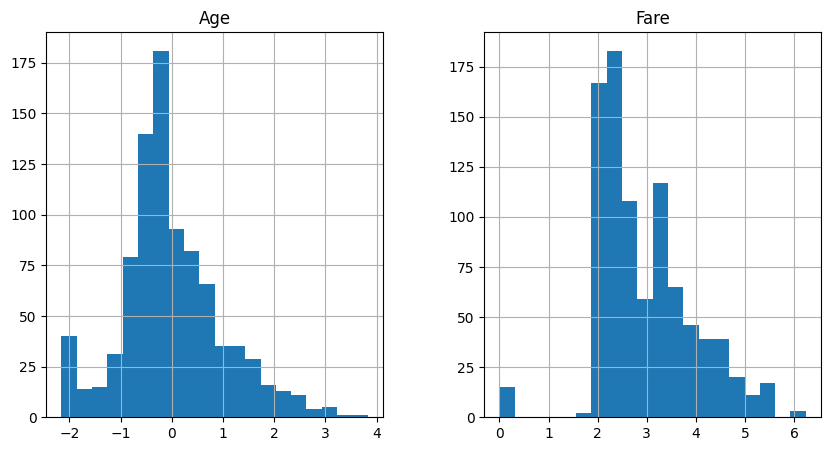

In [81]:
#Distribution check
df[['Age', 'Fare']].hist(figsize=(10,5), bins=20)
plt.show()

##### Age distribution 
- Right-skewed: Some older passengers (up to 80), but very few.

##### Fare Distribution
- Highly skewed: Most passengers paid low fares, but a few paid very high fares (long tail on the right).

### Exporting dataframe into csv

In [82]:
from pathlib import Path  
filepath = Path('C:\\Users\\karth\\Machine_Learning\\titanicPassengerSurvival\\titanicDataset\\processed_train_v2.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df.to_csv(filepath) 

In [83]:
#import dataset 
df = pd.read_csv("titanicDataset\\processed_train_v2.csv")
#print the data shape
print(df.shape)

(891, 20)


In [84]:
#print the dataset
df.head(10)

,Unnamed: 0,Title_Don,Title_Jonkheer,Title_Officer,Title_Master,Title_Sir,Title_Mr,Title_Miss,Title_Mrs,Age,Sex,Fare,Pclass_2,Pclass_3,Deck,FamilySize,IsAlone,Embarked_Q,Embarked_S,Survived
0,0,0,0,0,0,0,1,0,0,-0.534591,0,2.110213,0,1,0,1,0,0,1,0
1,1,0,0,0,0,0,0,0,1,0.668017,1,4.280593,0,0,3,1,0,0,0,1
2,2,0,0,0,0,0,0,1,0,-0.233939,1,2.188856,0,1,0,0,1,0,1,1
3,3,0,0,0,0,0,0,0,1,0.442528,1,3.990834,0,0,3,1,0,0,1,1
4,4,0,0,0,0,0,1,0,0,0.442528,0,2.202765,0,1,0,0,1,0,1,0
5,5,0,0,0,0,0,1,0,0,-0.309102,0,2.246893,0,1,0,0,1,1,0,0
6,6,0,0,0,0,0,1,0,0,1.870624,0,3.967694,0,0,5,0,1,0,1,0
7,7,0,0,0,1,0,0,0,0,-2.037850,0,3.094446,0,1,0,4,0,0,1,0
8,8,0,0,0,0,0,0,0,1,-0.158776,1,2.495954,0,1,0,2,0,0,1,1
9,9,0,0,0,0,0,0,0,1,-1.135895,1,3.436268,1,0,0,1,0,0,0,1
